In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
import datetime
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS


pd.set_option("max_rows", 75)


In [3]:
# this is the stop words list for the countvectorizer
custom_words = list(set(
    list(ENGLISH_STOP_WORDS) + list(stopwords.words('english')) + 
    ['and','of','for','the','com','amp','https','http']))

# This function outputs a dataframe with text used by good handles and top text that isn't used by good handles
def frequency_words(df, handles):
    # dataframe of tweets from friendly handles given approved by client
    info = tweets[tweets['username'].str.lower().isin([x.lower() for x in handles])]
    #instantiate countvect for good info and transform tweets from safe_handles to dataframe
    info_cvec = CountVectorizer(stop_words = custom_words)
    info_cv = info_cvec.fit_transform(info.text)
    info_words = pd.DataFrame(info_cv.toarray(), columns = info_cvec.get_feature_names())
    info_count = info_words.sum().sort_values(ascending=False)
    
    #create new word list with words used by verified accounts
    new_stops = custom_words + info_cvec.get_feature_names()
    misinfo = tweets[~tweets['username'].str.lower().isin([x.lower() for x in handles])]

    misinfo_cvec = CountVectorizer(stop_words = new_stops)
    misinfo_cv = misinfo_cvec.fit_transform(misinfo.text)
    misinfo_words = pd.DataFrame(misinfo_cv.toarray(), columns = misinfo_cvec.get_feature_names())
    
    misinfo_count = misinfo_words.sum().sort_values(ascending=False)
    return info_count, misinfo_count


In [4]:
harvey_handles = ['fema','usaid']
mendocino_handles = ['fema','usaid','calfire','MendoSheriff','calfire_meu', 'cagovernor','FEMARegion9','r5_fire_news', 'MendocinoNF']
aussie_handles = ['afacnews','act_esa','abcemergency','frnsw','qldfes','cfsalerts']

good_handles = aussie_handles


good_info, bad_info = frequency_words(tweets, good_handles)
word_count = pd.DataFrame(bad_info, columns = ['count'])

# word_count.loc['arson']


word_count

NameError: name 'tweets' is not defined

In [3]:
df10 = pd.read_csv('../data/harvey/hurricanharvey_10000.csv')
df50 = pd.read_csv('../data/harvey/hurricaneharvey_50000.csv')
# df.drop(['geo'],axis=1, inplace=True)


In [4]:
df28 = pd.concat([df50, df10])
df28.shape

(27986, 15)

In [6]:
df28.shape

(27986, 15)

In [16]:
df10.shape

(10000, 15)

In [7]:
df28.dropna(subset=['text'],inplace=True)
df28['hashtags'].fillna('harvey',inplace=True)
df28['to'].fillna('self',inplace=True)
df28['urls'].fillna('None',inplace=True)
df28.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27985 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   username        27985 non-null  object 
 1   to              27985 non-null  object 
 2   text            27985 non-null  object 
 3   retweets        27985 non-null  int64  
 4   favorites       27985 non-null  int64  
 5   replies         27985 non-null  int64  
 6   id              27985 non-null  int64  
 7   permalink       27985 non-null  object 
 8   author_id       27985 non-null  int64  
 9   date            27985 non-null  object 
 10  formatted_date  27985 non-null  object 
 11  hashtags        27985 non-null  object 
 12  mentions        9680 non-null   object 
 13  geo             0 non-null      float64
 14  urls            27985 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.4+ MB


In [149]:
# X= df.drop(['predictions','urls','geo','to'],axis=1)
features = ['username', 'text', 'retweets', 'favorites',
       'replies', 'id', 'permalink', 'author_id', 'date', 'formatted_date',
       'hashtags', 'mentions', 'cleaned_tweets',
       'lemmatized_tweets']
X = df['text']
y= df['predictions']

In [150]:
X.shape

(59396,)

In [151]:
y.shape

(59396,)

In [152]:
df2 = pd.concat([df,pd.get_dummies(df['text'])],axis=1)
df2.shape

(59396, 7035)

In [153]:
centroids = df2.groupby(by='predictions')[features].mean()
centroids.head()

,retweets,favorites,replies,id,author_id
predictions,,,,,
0,34.003125,30.121875,1.955938,1.027174e+18,1.237819e+16
1,46.204182,60.106806,2.042025,1.027207e+18,3.138219e+16
2,60.984135,82.978414,1.999480,1.045759e+18,2.225978e+14
3,1078.059752,2654.937430,101.377114,1.024436e+18,1.539253e+16
4,1095.121864,3148.570789,1883.969534,1.024469e+18,3.325388e+07


In [158]:
features2 = df2.columns.drop(['geo','urls','to','Unnamed: 0','predictions'])
X2= features2
y2= df2['predictions']

KeyError: "None of [Int64Index([6, 5, 6, 2, 2, 6, 6, 6, 6, 6,\n            ...\n            2, 2, 2, 2, 2, 2, 2, 2, 2, 2],\n           dtype='int64', length=59396)] are in the [columns]"

<Figure size 504x504 with 0 Axes>

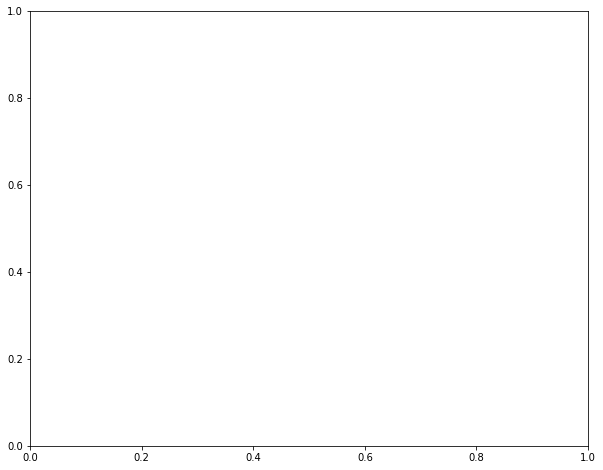

In [160]:
# plt.figure(figsize=(7,7));

# ## Plot scatter by cluster / color, and centroids
# colors = ["red", "green", "blue",'yellow','orange','black','purple']
# df2['color'] = df2['predictions'].map(lambda p: colors[p])

# ax = df2.plot(    
#     kind="scatter", 
#     x=X2, y=y2,
#     figsize=(10,8),
#     c = df2['color']
# # )

# # centroids.plot(
# #     kind="scatter", 
# #     x=X2, y=y2, 
# #     marker="*", c=["r", "g", "b",'y','o','b','p'], s=550,
# #     ax=ax
# );

## let's try something different

In [12]:
df.columns

Index(['username', 'to', 'text', 'retweets', 'favorites', 'replies', 'id',
       'permalink', 'author_id', 'date', 'formatted_date', 'hashtags',
       'mentions', 'urls'],
      dtype='object')

In [13]:
df.groupby('username')['retweets'].mean().sort_values(ascending=False)

username
JaniceDean         829.555556
FriedrichPieter    630.000000
ChelseaClinton     566.000000
Franklin_Graham    199.500000
dollymad1812       181.000000
                      ...    
UWayCassCounty       0.000000
UncleCO2             0.000000
UnfilteredCoach      0.000000
UnifiedHealth1       0.000000
000l0lll000l         0.000000
Name: retweets, Length: 7832, dtype: float64

In [17]:
df.shape

(17985, 14)

In [19]:
pd.options.display.max_colwidth = 400
df28[df28['text'].str.contains("shark")]


,username,to,text,retweets,favorites,replies,id,permalink,author_id,date,formatted_date,hashtags,mentions,geo,urls
456,gomez_chelsea,self,Remember the fake picture of a shark during #HurricaneHarvey ? Or the fake helicopter crash video of #Kobe ? Learn more about #fakenews on social in my newest blog post https://link.medium.com/xKIZ0akuq4 #HarlowS20,1,0,0,1233095747157024768,https://twitter.com/gomez_chelsea/status/1233095747157024768,1860902107,2020-02-27 18:25:10+00:00,Thu Feb 27 18:25:10 +0000 2020,#HurricaneHarvey #Kobe #fakenews #HarlowS20,NaN,NaN,https://link.medium.com/xKIZ0akuq4
6311,ThatDudeIssac,derek_mafs,lol that shark has survived several storms right about now including #HurricaneHarvey #Legendary,0,0,0,1050194242788880384,https://twitter.com/ThatDudeIssac/status/1050194242788880384,1661443225,2018-10-11 01:19:53+00:00,Thu Oct 11 01:19:53 +0000 2018,#HurricaneHarvey #Legendary,NaN,NaN,None
7171,mhmiller,Jeggit,"That shark has been everywhere - every flood or natural disaster that shark pops up #HurricaneHarvey #HurricaneSandy #HurricaneIrma #HurricaneMaria #HurricaneFlorence - shoot that shark may have been swimming during Camille, Andrew and Katrina....#QuitPushingFakeNews",0,1,0,1040640796054237184,https://twitter.com/mhmiller/status/1040640796054237184,15294719,2018-09-14 16:37:54+00:00,Fri Sep 14 16:37:54 +0000 2018,#HurricaneHarvey #HurricaneSandy #HurricaneIrma #HurricaneMaria #HurricaneFlorence #QuitPushingFakeNews,NaN,NaN,https://twitter.com/Jeggit/status/1040468444536287233
11779,gina_calanni,self,Town Hall after party with the team. #friendshipgoals #foodie #chef #shark #foodstagram #foodphotography #wine #townhall #katytx #texas #hurricane #hurricaneharvey #congress #community… https://www.instagram.com/p/BmOT6IShiki/?utm_source=ig_twitter_share&amp;igshid=1rb29c4gzjzz,1,0,0,1027221067591503873,https://twitter.com/gina_calanni/status/1027221067591503873,111054940,2018-08-08 15:52:42+00:00,Wed Aug 08 15:52:42 +0000 2018,#friendshipgoals #foodie #chef #shark #foodstagram #foodphotography #wine #townhall #katytx #texas #hurricane #hurricaneharvey #congress #community,NaN,NaN,https://www.instagram.com/p/BmOT6IShiki/?utm_source=ig_twitter_share&igshid=1rb29c4gzjzz
321,dadiyata,AJStream,"Off course, the viral image of the shark swimming on a free way in Houston, Texas during the #HurricanHarvey",0,1,1,907990234452844544,https://twitter.com/dadiyata/status/907990234452844544,221402621,2017-09-13 15:31:56+00:00,Wed Sep 13 15:31:56 +0000 2017,#HurricanHarvey,NaN,NaN,https://twitter.com/AJStream/status/907988406759813121
424,KhanMoiez,mak_asif,Somehow the same shark was found in Texas in #hurricanharvey What a conicident.,0,0,0,907335386732658688,https://twitter.com/KhanMoiez/status/907335386732658688,1321734290,2017-09-11 20:09:48+00:00,Mon Sep 11 20:09:48 +0000 2017,#hurricanharvey,NaN,NaN,https://twitter.com/woridstarcomedy/status/902715306661085184
4106,ExeterDormouse,self,Nope. Not a shark swimming down a Houston street after #HurricanHarvey http://www.snopes.com/photos/animals/puertorico.asp,0,0,1,902205898101329920,https://twitter.com/ExeterDormouse/status/902205898101329920,1124814794,2017-08-28 16:27:02+00:00,Mon Aug 28 16:27:02 +0000 2017,#HurricanHarvey,NaN,NaN,http://www.snopes.com/photos/animals/puertorico.asp
5962,TheREALityShowY,self,"@weatherchannel @CNNweather Flooding is getting bad south loop 610, a shark was ""spotted."" HurricanHarvey #HoustonFlood",6,3,4,901853493438414848,https://twitter.com/TheREALityShowY/status/901853493438414848,740140393036025861,2017-08-27 17:06:43+00:00,Sun Aug 27 17:06:43 +0000 2017,#HoustonFlood,@weatherchannel @CNNweather,NaN,None
6747,jenjen1172,self,Waiting #HurricanHarvey out by watching my fav team #houstontexans with my fav beer #landshark. #TexansGameday,0,0,0,901605010252943361,https://twitter.com/jenjen1172/status/901605010252943361,108764163,2017-08-27 00:39:20+00:00,Sun Aug 27 00:39:20 +0000 2017,#HurricanHarvey #houstontexans #landshark #TexansGameday

In [53]:
pd.options.display.max_colwidth = 400
hoax = df[df['text'].str.contains("immigrant|shark|conspiracy|hoax|planes|ants|lies|rumor|fake|bathtubs|hotels|pets|dishwasher|distribution|shelter")]
hoax.shape

(375, 14)

In [56]:
hoax

,username,to,text,retweets,favorites,replies,id,permalink,author_id,date,formatted_date,hashtags,mentions,urls
0,ChrisTheYank,NaN,Handing out more along with church folk supplies to those still in need for #HurricanHarvey.… https://www.instagram.com/p/BZrrOONjmQj/,0,0,0,914260113971646464,https://twitter.com/ChrisTheYank/status/914260113971646464,342548477,2017-09-30 22:46:11+00:00,Sat Sep 30 22:46:11 +0000 2017,#HurricanHarvey,NaN,https://www.instagram.com/p/BZrrOONjmQj/
21,ThatBoiPolo,NaN,I hope @ATT superiors are hit by a national disaster so they are able to relate to the families devastated by #HurricanHarvey unlimited data wasn't and isn't what Houston needed.,0,0,0,913105008471810048,https://twitter.com/ThatBoiPolo/status/913105008471810048,29574112,2017-09-27 18:16:13+00:00,Wed Sep 27 18:16:13 +0000 2017,#HurricanHarvey,@ATT,NaN
32,UHIN_HIE,NaN,"Nick Bonvino showing the megashelters set up for 30,000+ evacuees displaced by #hurricanharvey. #UHINHIT @HealthconnectTX #interoperability",0,1,0,912703781602652160,https://twitter.com/UHIN_HIE/status/912703781602652160,4893724693,2017-09-26 15:41:53+00:00,Tue Sep 26 15:41:53 +0000 2017,#hurricanharvey #UHINHIT #interoperability,@HealthconnectTX,NaN
43,StillSmileToday,NaN,"The @REDCross is now providing $400 to families effected by #HurricanHarvey, apply now here: https://www.disasterverification.com/redcross/",0,0,0,912343133119066112,https://twitter.com/StillSmileToday/status/912343133119066112,905155911034970112,2017-09-25 15:48:48+00:00,Mon Sep 25 15:48:48 +0000 2017,#HurricanHarvey,@RedCross,https://www.disasterverification.com/redcross/
74,BabyTooth_Ctr,NaN,Help us collect school supplies for kids affected by #HurricanHarvey! Drop off donations this month for a chance to win great prizes.,0,0,0,911287780986245121,https://twitter.com/BabyTooth_Ctr/status/911287780986245121,900068658990522370,2017-09-22 17:55:12+00:00,Fri Sep 22 17:55:12 +0000 2017,#HurricanHarvey,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9725,NewsPuppet,NaN,@Rambobiggs @joshdcaplan #MAGA #HurricanHarvey http://www.puppetstringnews.com/blog/there-is-a-nuclear-power-plant-in-houston-in-the-path-of-harvey There is a nuclear power plant in Houston in the path of Harvey,3,0,1,901302587533557761,https://twitter.com/NewsPuppet/status/901302587533557761,4282987814,2017-08-26 04:37:36+00:00,Sat Aug 26 04:37:36 +0000 2017,#MAGA #HurricanHarvey,@Rambobiggs @joshdcaplan,http://www.puppetstringnews.com/blog/there-is-a-nuclear-power-plant-in-houston-in-the-path-of-harvey
9795,ThesociologistS,JoeFeagin,Trump continues to stand against Immigrants with this pardon. More of his #Xenophobic policies. Using #HurricanHarvey as a distraction,0,0,0,901301016343101440,https://twitter.com/ThesociologistS/status/901301016343101440,825875826553991169,2017-08-26 04:31:22+00:00,Sat Aug 26 04:31:22 +0000 2017,#Xenophobic #HurricanHarvey,NaN,https://twitter.com/JoeFeagin/status/901249241913450496
9831,junryl0814,NaN,I'm from rock port and I just wanna ask y'all to send prayers there school is gone pray for the families #HurricanHarvey #prayfortexas,4,13,2,901300373385879557,https://twitter.com/junryl0814/status/901300373385879557,4096368612,2017-08-26 04:28:49+00:00,Sat Aug 26 04:28:49 +0000 2017,#HurricanHarvey #prayfortexas,NaN,NaN
9947,LoveAll_95,NaN,Alright @MattFinnFNC I think it's time to take shelter!! You're WAY too close to that water #HurricanHarvey #harvey2017 #FoxNews,0,1,0,901297666268770304,https://twitter.com/LoveAll_95/status/901297666268770304,1297687418,2017-08-26 04:18:03+00:00,Sat Aug 26 04:18:03 +0000 2017,#HurricanHarvey #harvey2017 #FoxNews,@MattFinnFNC,NaN
